<a href="https://colab.research.google.com/github/GabsGrego/DentalDiseaseDetector/blob/main/Detec%C3%A7%C3%A3o_de_Doen%C3%A7as_Dent%C3%A1rias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVC para Detecção de Doenças Dentarias

Nosso modelo em desenvolvimento tem como finalidade detectar doenças dentárias através da analise de imagens. Utilizamos da plataforma RoboFlow para treinamento de nossa Inteligencia Artificial e contamos com um dataset de mais de duas mil imagens para as predições.

Até o momento nossa IA é capaz de detectar casos de tartaro, placas, manchas, gengivite, caries e má formações ou desalinhamento dos dentes.

### Importação de Bibliotecas necessárias

In [6]:
# Instalar a biblioteca de SDK
!pip install inference-sdk

# Importar a biblioteca do SDK de inferência
from inference_sdk import InferenceHTTPClient

# Fazer upload de uma imagem local (no caso, via Colab)
from google.colab import files
uploaded = files.upload()  # Suba a imagem que deseja testar

import cv2
import matplotlib.pyplot as plt

Saving Sem título2.jpg to Sem título2.jpg


### Realizando a Detecção

In [7]:
# Inicializar o cliente com a chave da API fornecida
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="tDVHiwKwXkgY4oKGD8Oy")  # chave de API do Roboflow

# Caminho para a imagem que foi carregada
image_path = "/content/exemplo.jpg"

# Inferir na imagem
result = CLIENT.infer(image_path, model_id="ddisease-hcgnk/1")

# Exibir o resultado da predição em JSON
print(result)

### Exibição da imagem

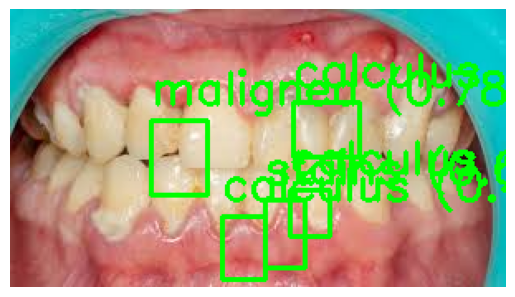

In [11]:
# Carregar a imagem original
image = cv2.imread(image_path)

# Desenhar caixas de predição
for prediction in result['predictions']:
    x, y, width, height = prediction['x'], prediction['y'], prediction['width'], prediction['height']
    label = prediction['class']
    confidence = prediction['confidence']

    # Desenhar a caixa na imagem
    cv2.rectangle(image, (int(x), int(y)), (int(x + width), int(y + height)), (0, 255, 0), 2)
    cv2.putText(image, f'{label} ({confidence:.2f})', (int(x), int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Converter de BGR para RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Exibir a imagem com as caixas
plt.imshow(image_rgb)
plt.axis('off')  # Para não exibir o eixo
plt.show()
